## IMPORTING IMPORTANT LIBRARIES

In [814]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

### Importing data

In [815]:
df=pd.read_csv('data.csv')

In [816]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

## Data Understanding and Preprocessing:

In [817]:
df.shape

(6819, 96)

In [818]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [819]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [820]:
# To show all the columns 
pd.set_option('display.max_columns', None)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [821]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [822]:
# checking the value counts of liability column
df[' Liability-Assets Flag'].value_counts()

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64

In [823]:
# checking the value counts of net income column
df[' Net Income Flag'].value_counts()

1    6819
Name:  Net Income Flag, dtype: int64

### Checking the correlation between the columns
    Taking only those columns whose correlation with bankrupt column is more than 0.15 and less than -0.15

In [824]:
corrMatrix = df.corr()[['Bankrupt?']]
corrMatrix

,Bankrupt?
Bankrupt?,1.000000
ROA(C) before interest and depreciation before interest,-0.260807
ROA(A) before interest and % after tax,-0.282941
ROA(B) before interest and depreciation after tax,-0.273051
Operating Gross Margin,-0.100043
...,...
Liability to Equity,0.166812
Degree of Financial Leverage (DFL),0.010508
Interest Coverage Ratio (Interest expense to EBIT),-0.005509
Net Income Flag,NaN


In [825]:
ltidx=corrMatrix.loc[corrMatrix['Bankrupt?'] <=-0.15].index

In [826]:
gtidx=corrMatrix.loc[corrMatrix['Bankrupt?'] >=0.15].index

In [827]:
df1=df[ltidx]

In [828]:
df2=df[gtidx]

In [829]:
# storing that columns in one dataframe
bank=pd.concat([df1,df2],axis=1)

In [830]:
bank.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Net worth/Assets',
       ' Net profit before tax/Paid-in capital',
       ' Working Capital to Total Assets',
       ' Retained Earnings to Total Assets', ' Net Income to Total Assets',
       ' Net Income to Stockholder's Equity', 'Bankrupt?', ' Debt ratio %',
       ' Borrowing dependency', ' Current Liability to Assets',
       ' Current Liabilities/Equity', ' Current Liability to Equity',
       ' Current Liability to Current Assets', ' Liability to Equity'],
      dtype='object')

In [831]:
bank.shape

(6819, 22)

In [832]:
# Checking the null values
bank.isna().sum()

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Net Value Per Share (B)                                    0
 Net Value Per Share (A)                                    0
 Net Value Per Share (C)                                    0
 Persistent EPS in the Last Four Seasons                    0
 Per Share Net profit before tax (Yuan ¥)                   0
 Net worth/Assets                                           0
 Net profit before tax/Paid-in capital                      0
 Working Capital to Total Assets                            0
 Retained Earnings to Total Assets                          0
 Net Income to Total Assets                                 0
 Net Income to Stockholder's Equity                         0
Bankrupt?                                                   0
 Debt ratio %                                               0
 Borrowi

In [833]:
# checking correlation with Bankrupt column from new dataframe
bank.corr()['Bankrupt?']

 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 Net Value Per Share (B)                                   -0.165399
 Net Value Per Share (A)                                   -0.165465
 Net Value Per Share (C)                                   -0.164784
 Persistent EPS in the Last Four Seasons                   -0.219560
 Per Share Net profit before tax (Yuan ¥)                  -0.201395
 Net worth/Assets                                          -0.250161
 Net profit before tax/Paid-in capital                     -0.207857
 Working Capital to Total Assets                           -0.193083
 Retained Earnings to Total Assets                         -0.217779
 Net Income to Total Assets                                -0.315457
 Net Income to Stockholder's Equity                        -0.180987
Bankrupt?                         

In [834]:
import seaborn as sns

In [835]:
bank

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Net worth/Assets,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Retained Earnings to Total Assets,Net Income to Total Assets,Net Income to Stockholder's Equity,Bankrupt?,Debt ratio %,Borrowing dependency,Current Liability to Assets,Current Liabilities/Equity,Current Liability to Equity,Current Liability to Current Assets,Liability to Equity
0,0.370594,0.424389,0.405750,0.147950,0.147950,0.147950,0.169141,0.138736,0.792424,0.137757,0.672775,0.903225,0.716845,0.827890,1,0.207576,0.390284,0.147308,0.339077,0.339077,0.118250,0.290202
1,0.464291,0.538214,0.516730,0.182251,0.182251,0.182251,0.208944,0.169918,0.828824,0.168962,0.751111,0.931065,0.795297,0.839969,1,0.171176,0.376760,0.056963,0.329740,0.329740,0.047775,0.283846
2,0.426071,0.499019,0.472295,0.177911,0.177911,0.193713,0.180581,0.142803,0.792484,0.148036,0.829502,0.909903,0.774670,0.836774,1,0.207516,0.379093,0.098162,0.334777,0.334777,0.025346,0.290189
3,0.399844,0.451265,0.457733,0.154187,0.154187,0.154187,0.193722,0.148603,0.848535,0.147561,0.725754,0.906902,0.739555,0.834697,1,0.151465,0.379743,0.098715,0.331509,0.331509,0.067250,0.281721
4,0.465022,0.538432,0.522298,0.167502,0.167502,0.167502,0.212537,0.168412,0.893491,0.167461,0.751822,0.913850,0.795016,0.839973,1,0.106509,0.375025,0.110195,0.330726,0.330726,0.047725,0.278514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.175045,0.175045,0.175045,0.216602,0.172102,0.875382,0.171111,0.817769,0.925611,0.799927,0.840359,0,0.124618,0.373823,0.103838,0.330914,0.330914,0.027951,0.279606
6815,0.475162,0.538269,0.524172,0.181324,0.181324,0.181324,0.216697,0.172780,0.900747,0.171805,0.793387,0.932629,0.799748,0.840306,0,0.099253,0.372505,0.089901,0.329753,0.329753,0.031470,0.278132
6816,0.472725,0.533744,0.520638,0.269521,0.269521,0.269521,0.210929,0.173232,0.961061,0.172287,0.866047,0.932000,0.797778,0.840138,0,0.038939,0.369637,0.024414,0.326921,0.326921,0.007542,0.275789
6817,0.506264,0.559911,0.554045,0.213392,0.213392,0.213392,0.228326,0.185584,0.913021,0.182498,0.832340,0.939613,0.811808,0.841084,0,0.086979,0.369649,0.083199,0.329294,0.329294,0.022916,0.277547


In [836]:
bank.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Net worth/Assets',
       ' Net profit before tax/Paid-in capital',
       ' Working Capital to Total Assets',
       ' Retained Earnings to Total Assets', ' Net Income to Total Assets',
       ' Net Income to Stockholder's Equity', 'Bankrupt?', ' Debt ratio %',
       ' Borrowing dependency', ' Current Liability to Assets',
       ' Current Liabilities/Equity', ' Current Liability to Equity',
       ' Current Liability to Current Assets', ' Liability to Equity'],
      dtype='object')

### Renaming the columns for easy understanding

In [837]:
d={' ROA(C) before interest and depreciation before interest':'ROA(C)',' ROA(A) before interest and % after tax':'ROA(A)',' ROA(B) before interest and depreciation after tax':'ROA(B)',
   ' Net Value Per Share (B)':'Net_Value(B)',' Net Value Per Share (A)':'Net_Value(A)',' Net Value Per Share (C)':'Net_Value(C)',' Persistent EPS in the Last Four Seasons':'EPS',' Per Share Net profit before tax (Yuan ¥)':'Net_profit_before_tax(Yuan)',
   ' Net worth/Assets':'Net_Worth',' Net profit before tax/Paid-in capital':'Net_profit_before_tax/paid',' Working Capital to Total Assets':'Working_capital',' Retained Earnings to Total Assets':'Retained_Earnings',' Net Income to Total Assets':'Net_Income_Total'," Net Income to Stockholder's Equity":'Net_Income_Stockholder',
   'Bankrupt?':'Bankrupt',' Debt ratio %':'Debt_ratio(Percent)',' Borrowing dependency':'Borrow_depend',' Current Liability to Assets':'current_Liability/Assets',' Current Liabilities/Equity':'Current_Liabilities/Equity',' Current Liability to Equity':'Current_Liability_to_Equity',' Current Liability to Current Assets':'Current_Liability_to_Current_Assets',
   ' Liability to Equity':'Liability_to_Equity'
  }

In [838]:
bank=bank.rename(columns=d)

In [839]:
bank.head()

,ROA(C),ROA(A),ROA(B),Net_Value(B),Net_Value(A),Net_Value(C),EPS,Net_profit_before_tax(Yuan),Net_Worth,Net_profit_before_tax/paid,Working_capital,Retained_Earnings,Net_Income_Total,Net_Income_Stockholder,Bankrupt,Debt_ratio(Percent),Borrow_depend,current_Liability/Assets,Current_Liabilities/Equity,Current_Liability_to_Equity,Current_Liability_to_Current_Assets,Liability_to_Equity
0,0.370594,0.424389,0.405750,0.147950,0.147950,0.147950,0.169141,0.138736,0.792424,0.137757,0.672775,0.903225,0.716845,0.827890,1,0.207576,0.390284,0.147308,0.339077,0.339077,0.118250,0.290202
1,0.464291,0.538214,0.516730,0.182251,0.182251,0.182251,0.208944,0.169918,0.828824,0.168962,0.751111,0.931065,0.795297,0.839969,1,0.171176,0.376760,0.056963,0.329740,0.329740,0.047775,0.283846
2,0.426071,0.499019,0.472295,0.177911,0.177911,0.193713,0.180581,0.142803,0.792484,0.148036,0.829502,0.909903,0.774670,0.836774,1,0.207516,0.379093,0.098162,0.334777,0.334777,0.025346,0.290189
3,0.399844,0.451265,0.457733,0.154187,0.154187,0.154187,0.193722,0.148603,0.848535,0.147561,0.725754,0.906902,0.739555,0.834697,1,0.151465,0.379743,0.098715,0.331509,0.331509,0.067250,0.281721
4,0.465022,0.538432,0.522298,0.167502,0.167502,0.167502,0.212537,0.168412,0.893491,0.167461,0.751822,0.913850,0.795016,0.839973,1,0.106509,0.375025,0.110195,0.330726,0.330726,0.047725,0.278514


### Rearranging the columns and taking the Response column at the end

In [840]:
df1=bank.iloc[:,0:15]

In [841]:
df2=bank.iloc[:,15:]

In [842]:
bank=pd.concat([df2,df1],axis=1)

In [843]:
bank.head(2)

,Debt_ratio(Percent),Borrow_depend,current_Liability/Assets,Current_Liabilities/Equity,Current_Liability_to_Equity,Current_Liability_to_Current_Assets,Liability_to_Equity,ROA(C),ROA(A),ROA(B),Net_Value(B),Net_Value(A),Net_Value(C),EPS,Net_profit_before_tax(Yuan),Net_Worth,Net_profit_before_tax/paid,Working_capital,Retained_Earnings,Net_Income_Total,Net_Income_Stockholder,Bankrupt
0,0.207576,0.390284,0.147308,0.339077,0.339077,0.118250,0.290202,0.370594,0.424389,0.40575,0.147950,0.147950,0.147950,0.169141,0.138736,0.792424,0.137757,0.672775,0.903225,0.716845,0.827890,1
1,0.171176,0.376760,0.056963,0.329740,0.329740,0.047775,0.283846,0.464291,0.538214,0.51673,0.182251,0.182251,0.182251,0.208944,0.169918,0.828824,0.168962,0.751111,0.931065,0.795297,0.839969,1


### Checking and plotting the distribution of bankrupt (Response) column

<AxesSubplot:>

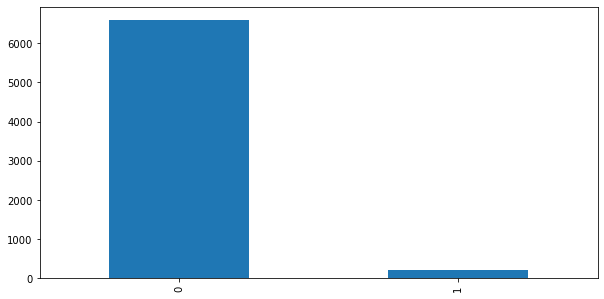

In [844]:
bank.Bankrupt.value_counts().plot(kind='bar', figsize=(10,5))

In [845]:
bank.corr()['Bankrupt']

Debt_ratio(Percent)                    0.250161
Borrow_depend                          0.176543
current_Liability/Assets               0.194494
Current_Liabilities/Equity             0.153828
Current_Liability_to_Equity            0.153828
Current_Liability_to_Current_Assets    0.171306
Liability_to_Equity                    0.166812
ROA(C)                                -0.260807
ROA(A)                                -0.282941
ROA(B)                                -0.273051
Net_Value(B)                          -0.165399
Net_Value(A)                          -0.165465
Net_Value(C)                          -0.164784
EPS                                   -0.219560
Net_profit_before_tax(Yuan)           -0.201395
Net_Worth                             -0.250161
Net_profit_before_tax/paid            -0.207857
Working_capital                       -0.193083
Retained_Earnings                     -0.217779
Net_Income_Total                      -0.315457
Net_Income_Stockholder                -0

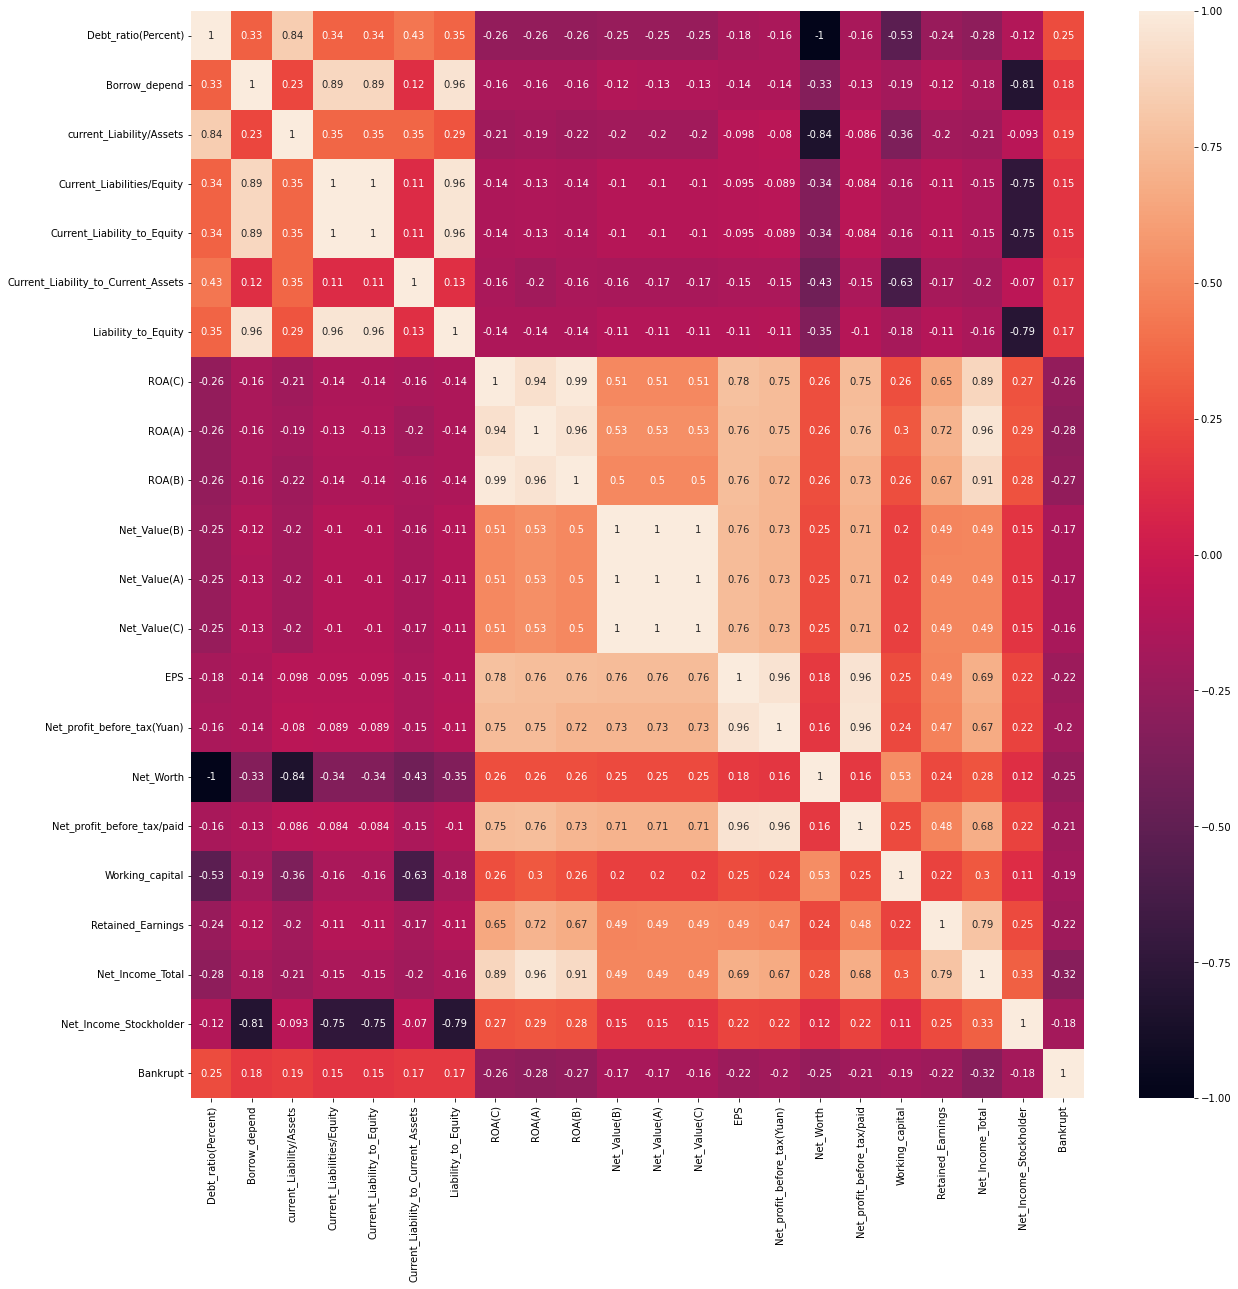

In [846]:
plt.figure(figsize=(20,20))
sns.heatmap(bank.corr(),annot=True,)
plt.show()

### Ploting the boxplot for every column to check outliers

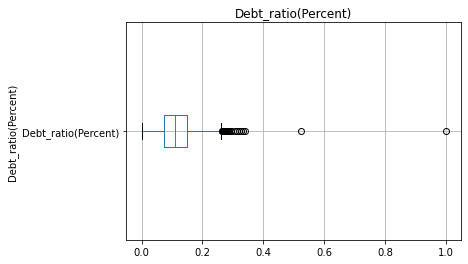

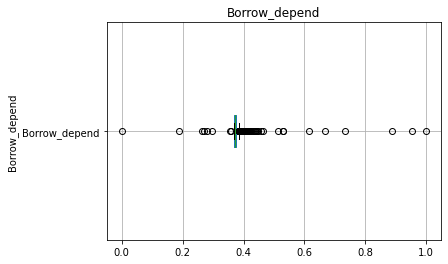

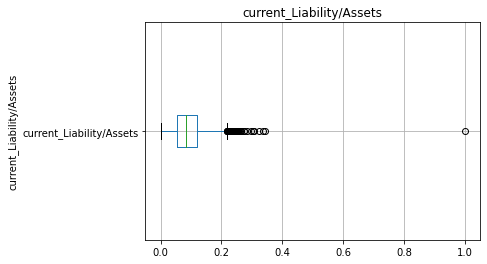

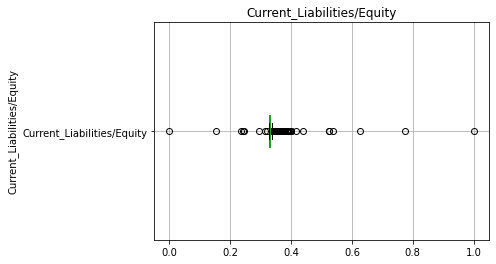

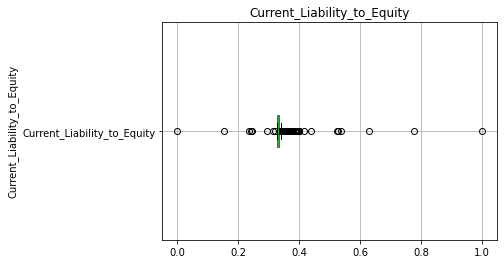

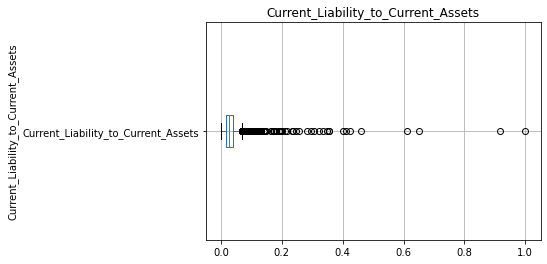

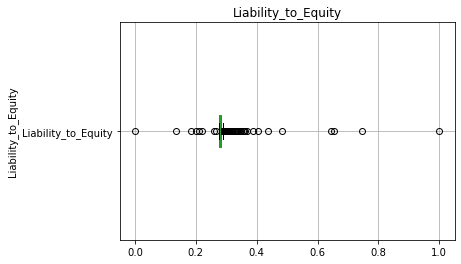

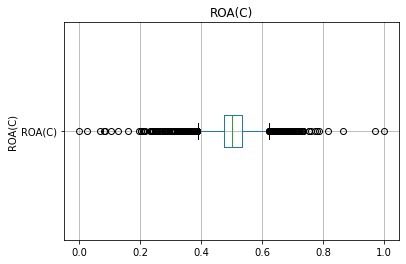

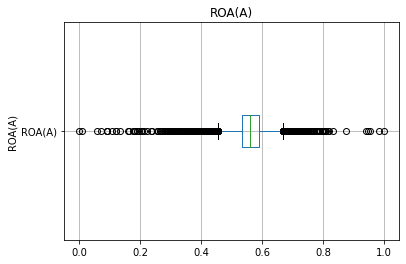

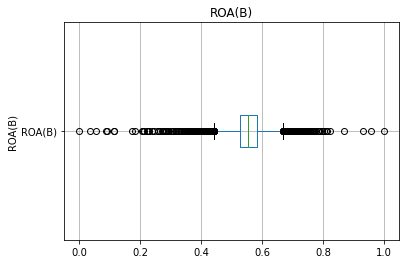

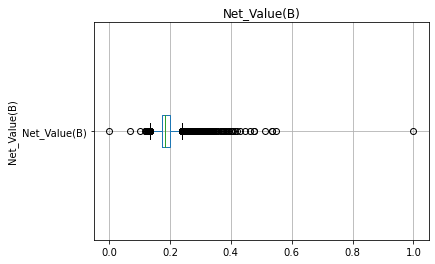

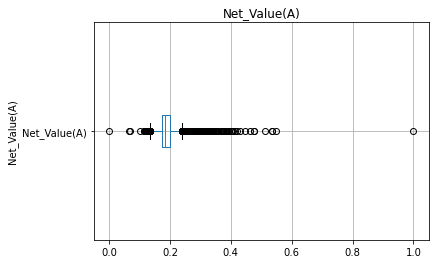

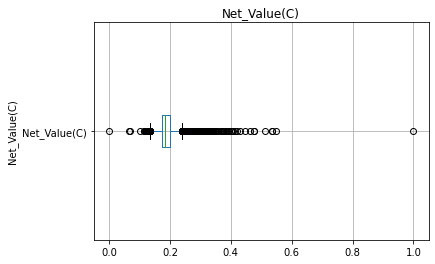

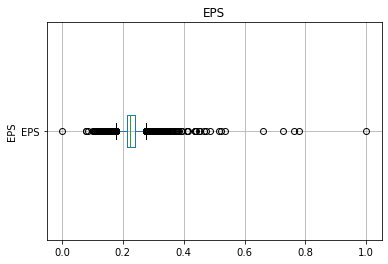

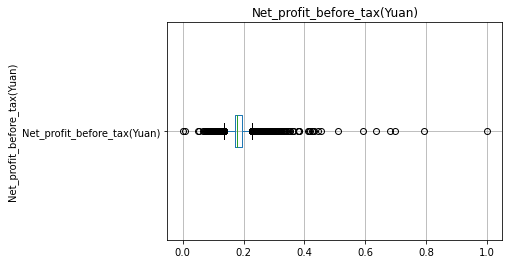

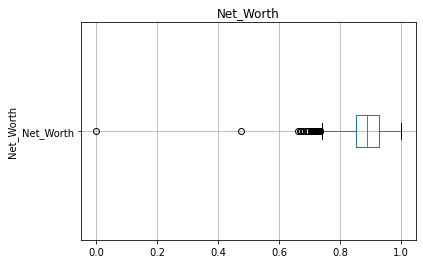

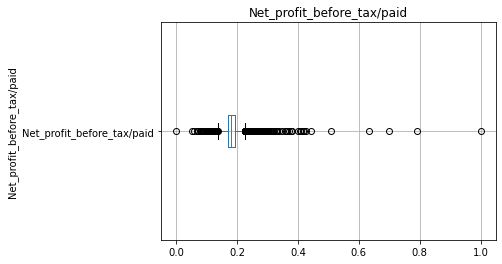

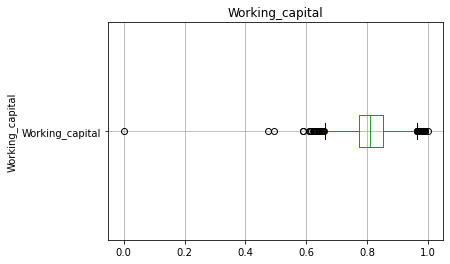

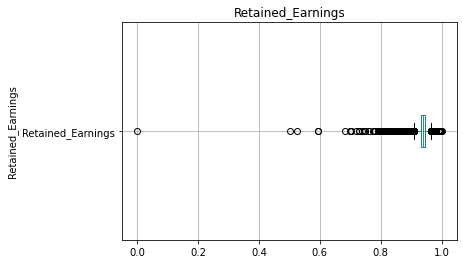

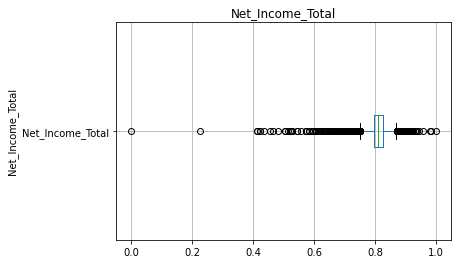

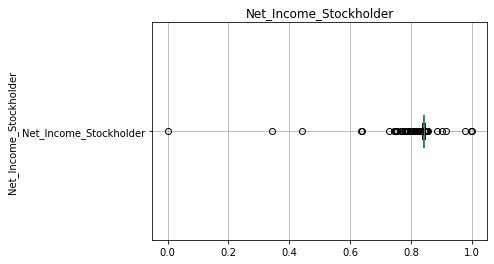

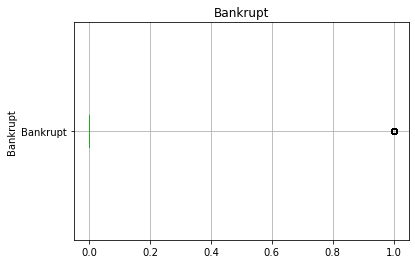

In [847]:
for feature in bank:
    bank.boxplot(feature, vert=False)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

## make a function to handle the outliers

In [848]:
def impute(x):
    Q3=bank[x].quantile(0.75)
    Q1=bank[x].quantile(0.25)
    IQR=Q3-Q1
    lb=Q1-2.5*(IQR) # taking value as 2.5 because data a not normally distrobuted
    ub=Q3+2.5*(IQR)
    idx=np.where(bank[x]>ub)
    bank[x].iloc[idx]=ub
    idx1=np.where(bank[x]<lb)
    bank[x].iloc[idx1]=lb

### Using the fuction to handle the outliers from every columns

In [849]:
for i in bank:
    if i!='Bankrupt':
        impute(i)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Now the correlation value increased after handing the outliers

In [850]:
bank.corr()['Bankrupt']

Debt_ratio(Percent)                    0.253227
Borrow_depend                          0.292011
current_Liability/Assets               0.197587
Current_Liabilities/Equity             0.225088
Current_Liability_to_Equity            0.225088
Current_Liability_to_Current_Assets    0.243896
Liability_to_Equity                    0.255528
ROA(C)                                -0.249865
ROA(A)                                -0.253544
ROA(B)                                -0.255203
Net_Value(B)                          -0.202965
Net_Value(A)                          -0.202990
Net_Value(C)                          -0.202063
EPS                                   -0.260763
Net_profit_before_tax(Yuan)           -0.248386
Net_Worth                             -0.253227
Net_profit_before_tax/paid            -0.251340
Working_capital                       -0.195158
Retained_Earnings                     -0.269649
Net_Income_Total                      -0.276803
Net_Income_Stockholder                -0

In [851]:
import matplotlib.pyplot as plt

### Checking the outliers

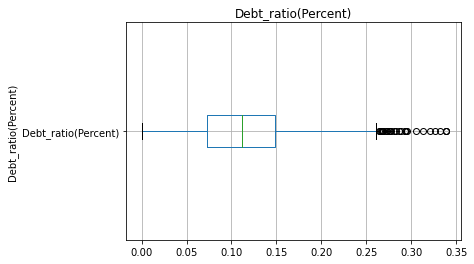

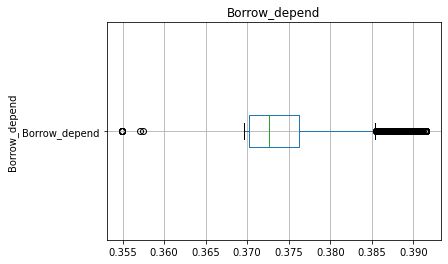

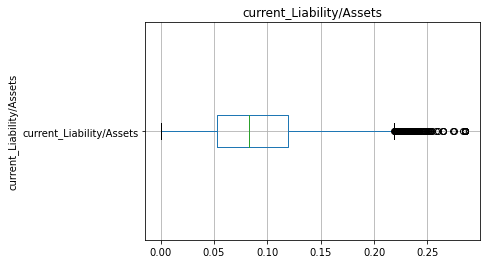

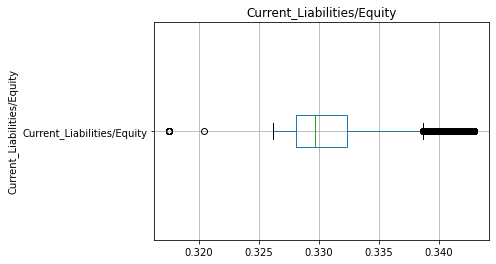

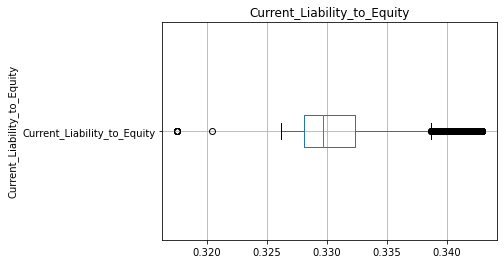

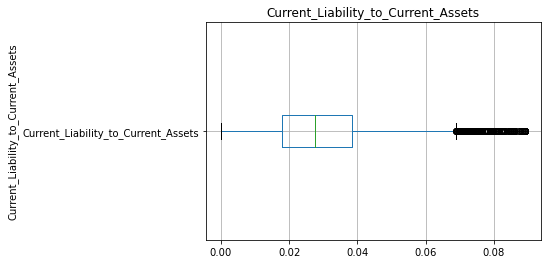

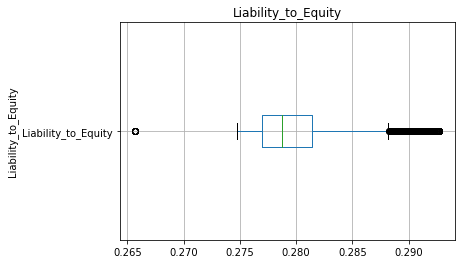

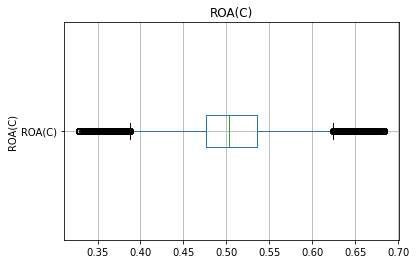

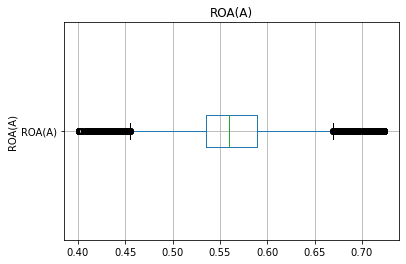

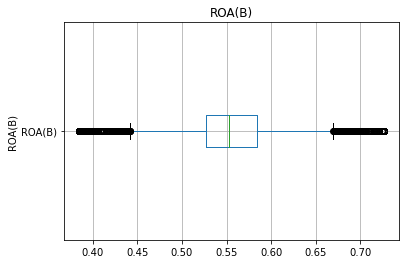

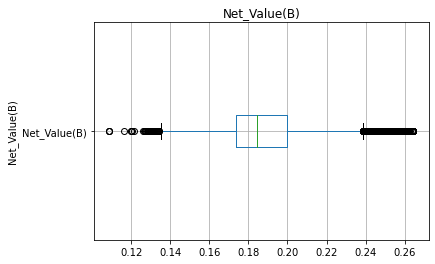

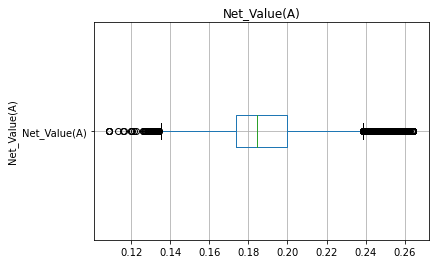

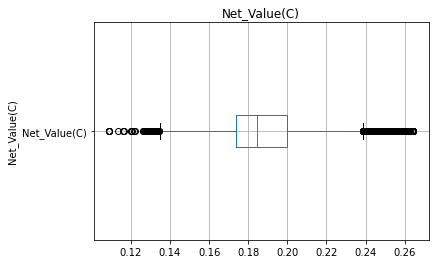

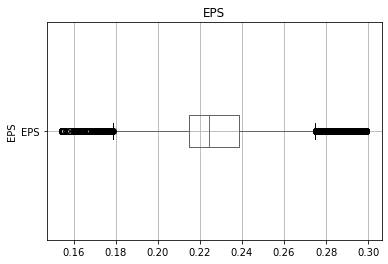

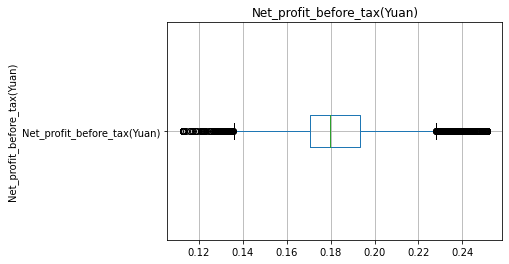

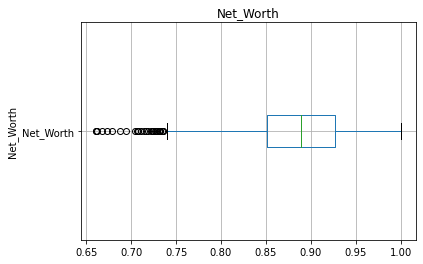

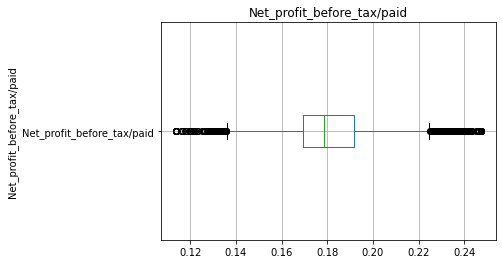

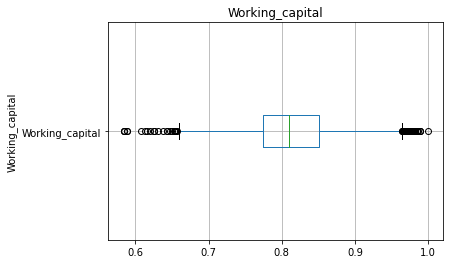

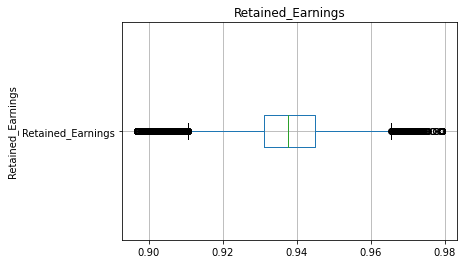

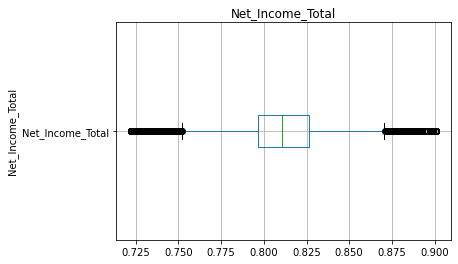

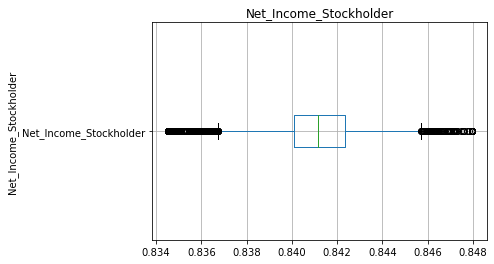

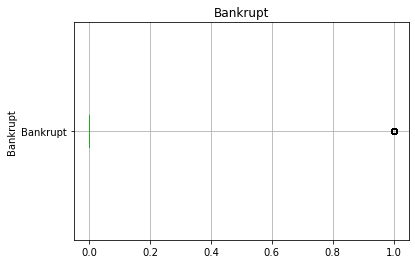

In [852]:
for feature in bank:
    bank.boxplot(feature, vert=False)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

## Exploratory Data Analysis (EDA):
    Generate descriptive statistics.

In [853]:
bank.describe()

,Debt_ratio(Percent),Borrow_depend,current_Liability/Assets,Current_Liabilities/Equity,Current_Liability_to_Equity,Current_Liability_to_Current_Assets,Liability_to_Equity,ROA(C),ROA(A),ROA(B),Net_Value(B),Net_Value(A),Net_Value(C),EPS,Net_profit_before_tax(Yuan),Net_Worth,Net_profit_before_tax/paid,Working_capital,Retained_Earnings,Net_Income_Total,Net_Income_Stockholder,Bankrupt
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.113053,0.374127,0.090539,0.330902,0.330902,0.030043,0.279862,0.505554,0.559843,0.554293,0.189184,0.189163,0.189202,0.227678,0.183105,0.886947,0.181630,0.814240,0.936375,0.809309,0.840967,0.032263
std,0.052745,0.005058,0.048996,0.003982,0.003982,0.017221,0.004066,0.056282,0.056649,0.055743,0.025696,0.025777,0.025787,0.024833,0.023838,0.052745,0.022566,0.058152,0.014910,0.031397,0.002375,0.176710
min,0.000000,0.354911,0.000000,0.317529,0.317529,0.000000,0.265682,0.328938,0.401507,0.385205,0.108719,0.108719,0.108834,0.154439,0.112563,0.661411,0.113800,0.584124,0.896810,0.722488,0.834509,0.000000
25%,0.072891,0.370168,0.053301,0.328096,0.328096,0.018034,0.276944,0.476527,0.535543,0.527277,0.173613,0.173613,0.173676,0.214711,0.170370,0.851196,0.169376,0.774309,0.931097,0.796750,0.840115,0.000000
50%,0.111407,0.372624,0.082705,0.329685,0.329685,0.027597,0.278778,0.502706,0.559802,0.552278,0.184400,0.184400,0.184400,0.224544,0.179709,0.888593,0.178456,0.810275,0.937672,0.810619,0.841179,0.000000
75%,0.148804,0.376271,0.119523,0.332322,0.332322,0.038375,0.281449,0.535563,0.589157,0.584105,0.199570,0.199570,0.199612,0.238820,0.193493,0.927109,0.191607,0.850383,0.944811,0.826455,0.842357,0.000000
max,0.338589,0.391528,0.285077,0.342889,0.342889,0.089227,0.292712,0.683152,0.723193,0.726176,0.264464,0.264464,0.264454,0.299092,0.251299,1.000000,0.247183,1.000000,0.979098,0.900716,0.847962,1.000000


<AxesSubplot:xlabel='Bankrupt', ylabel='count'>

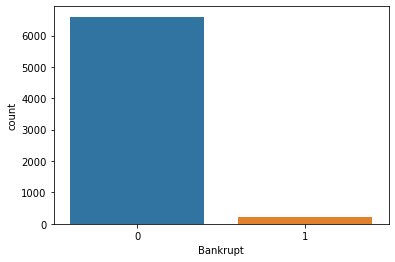

In [854]:
sns.countplot(x='Bankrupt',data=bank)

### Plotting histogram for every column
#### Visualize feature distributions and target variable.

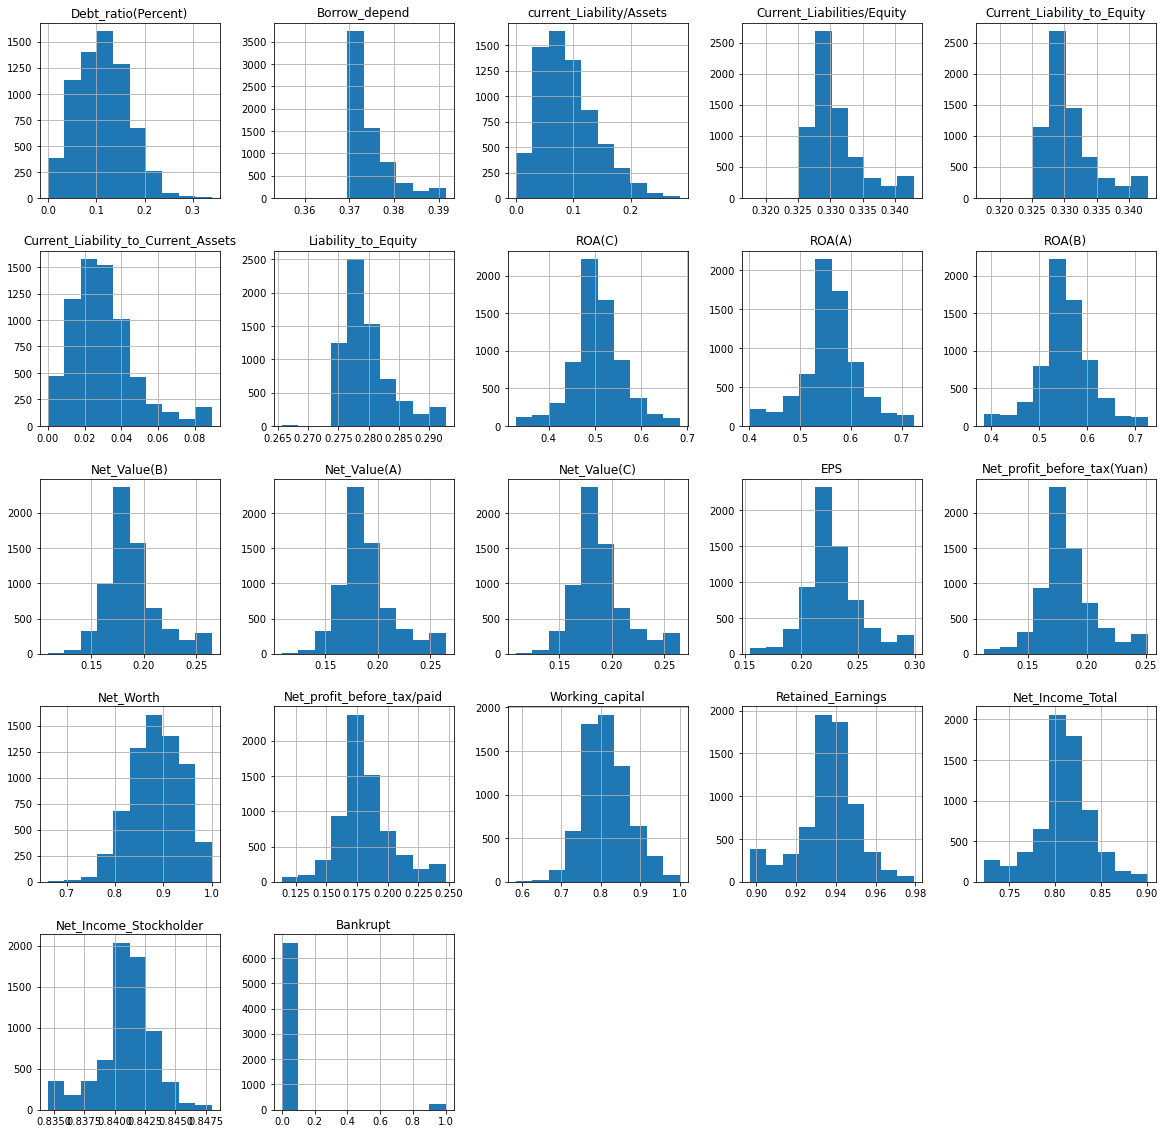

In [855]:
bank.hist(figsize=(20,20))
plt.show()

### Analyze relationships between features and the target variable.

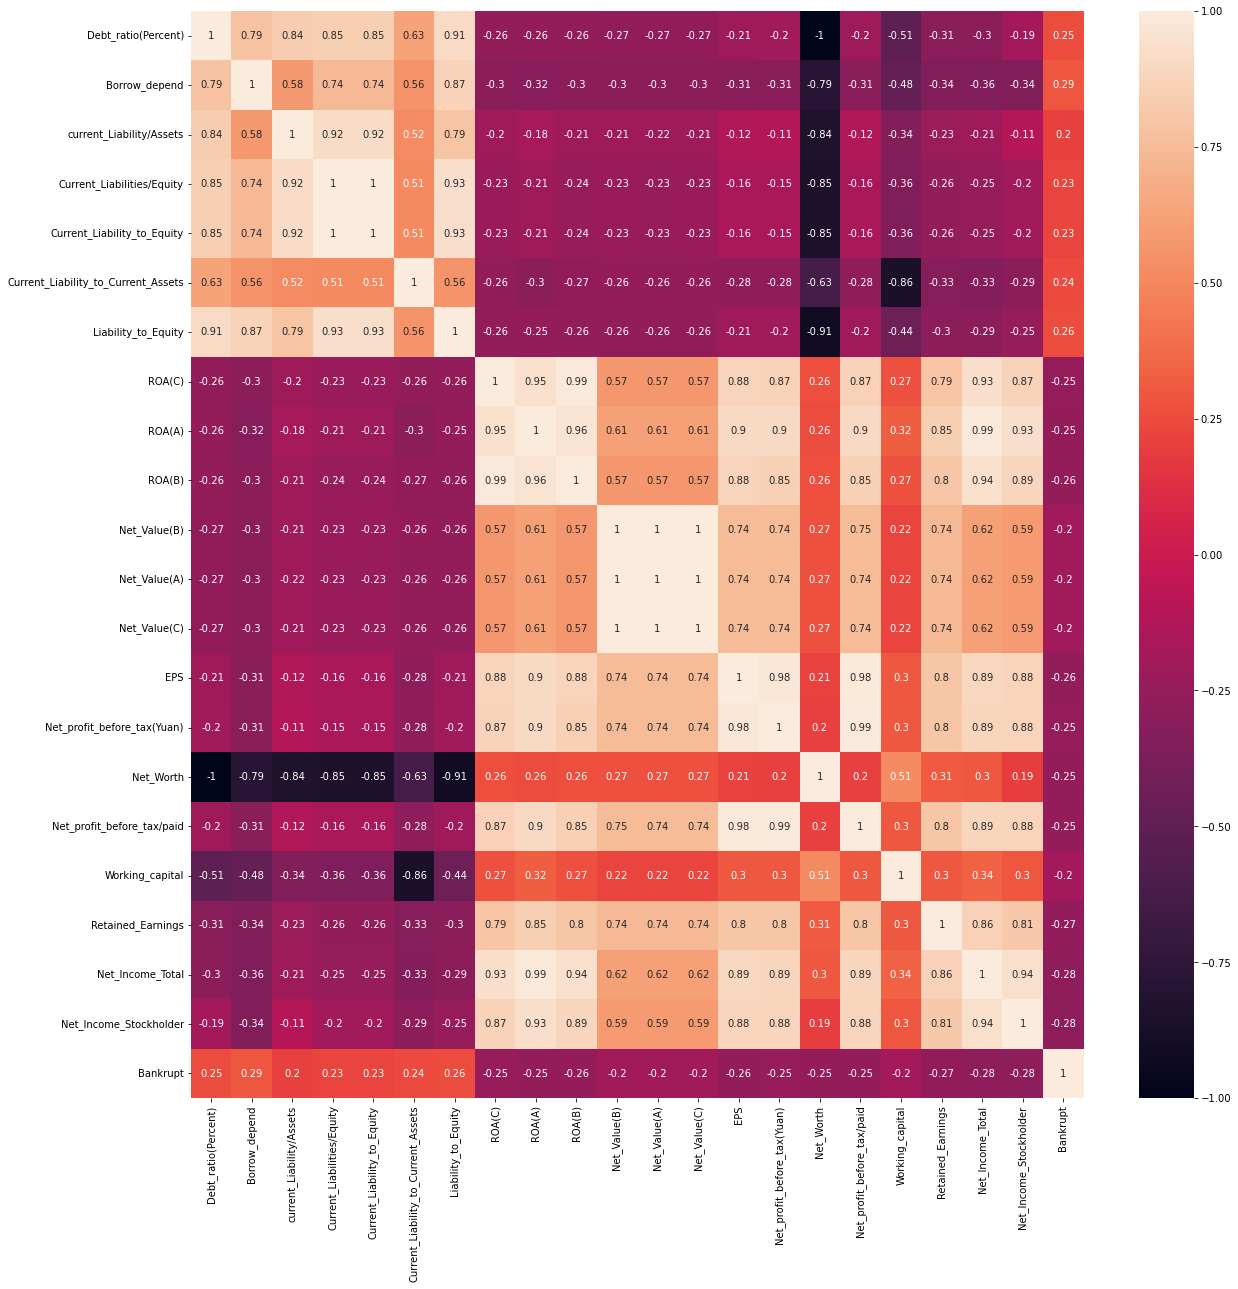

In [856]:
# Plotting heatmap
plt.figure(figsize=(20,20))
sns.heatmap(bank.corr(),annot=True)
plt.show()

### Hypothesis Testing:
##### Perform hypothesis testing to identify significant features influencing bankruptcy.
    Here,
        H0 = The predictor columns are not affecting the Response(Bankrupt) variable
        Ha = The Predictor columns are affecting the response(Bankrupt) variable

In [857]:
from scipy.stats import ttest_ind

# Hypothesis testing
significant_features = []
for column in bank.select_dtypes(include=[np.number]).columns:
    if column != 'Bankrupt':
        bankrupt = bank[bank['Bankrupt'] == 1][column]
        non_bankrupt = bank[bank['Bankrupt'] == 0][column]
        t_stat, p_val = ttest_ind(bankrupt, non_bankrupt)
        if p_val < 0.05:
            significant_features.append(column)
        print(f'{column}: t-statistic={t_stat}, p-value={p_val}')

print(f'Significant features: {significant_features}')

Debt_ratio(Percent): t-statistic=21.612122845725814, p-value=3.0092876331769683e-100
Borrow_depend: t-statistic=25.2086301756037, p-value=3.8497668797855455e-134
current_Liability/Assets: t-statistic=16.641842395633507, p-value=5.4726754321229296e-61
Current_Liabilities/Equity: t-statistic=19.07388214690795, p-value=4.6404763195997506e-79
Current_Liability_to_Equity: t-statistic=19.07388214690795, p-value=4.6404763195997506e-79
Current_Liability_to_Current_Assets: t-statistic=20.7643579101239, p-value=6.510266886055768e-93
Liability_to_Equity: t-statistic=21.82217580550458, p-value=4.184155770265348e-102
ROA(C): t-statistic=-21.30590528908092, p-value=1.4370164921528133e-97
ROA(A): t-statistic=-21.641067246314996, p-value=1.6730991302844108e-100
ROA(B): t-statistic=-21.792427544545546, p-value=7.682915994621045e-102
Net_Value(B): t-statistic=-17.11407042546083, p-value=2.5354406181433633e-64
Net_Value(A): t-statistic=-17.11620138694967, p-value=2.4480207140161555e-64
Net_Value(C): t-st

    Taking only those columns whose p-value is less than level of significance (0.05)
    Means P value is less than level of significance Hence Null Hypothesis is rejected
 ##### Conclusion -- All the columns are affecting the response variable (Bankrupt)

In [858]:
len(significant_features)

21

In [859]:
#sns.pairplot(bank[0:5])

## Feature Engineering and Selection:
     Feature engineering has been done above already we have selected only those columns whose correlation with responce 
     columns is greater than 0.15

## Modeling:

In [860]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [861]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Debt_ratio(Percent)                  6819 non-null   float64
 1   Borrow_depend                        6819 non-null   float64
 2   current_Liability/Assets             6819 non-null   float64
 3   Current_Liabilities/Equity           6819 non-null   float64
 4   Current_Liability_to_Equity          6819 non-null   float64
 5   Current_Liability_to_Current_Assets  6819 non-null   float64
 6   Liability_to_Equity                  6819 non-null   float64
 7   ROA(C)                               6819 non-null   float64
 8   ROA(A)                               6819 non-null   float64
 9   ROA(B)                               6819 non-null   float64
 10  Net_Value(B)                         6819 non-null   float64
 11  Net_Value(A)                  

### Split the data into training and testing sets.
    Taking response variable separately
    And Predictor columns separately

In [862]:
response=bank.iloc[:,-1]
predictor=bank.iloc[:,0:21]

In [863]:
x_train, x_test, y_train, y_test = train_test_split(predictor,response, test_size=0.2)

In [864]:
# Adding constant variables
x_train=sm.add_constant(x_train,prepend=False)
x_test=sm.add_constant(x_test,prepend=False)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Applying Logistic Regression for classification.

In [865]:
model=sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.090777
         Iterations 12


In [866]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:               Bankrupt   No. Observations:                 5455
Model:                          Logit   Df Residuals:                     5435
Method:                           MLE   Df Model:                           19
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.3921
Time:                        22:43:25   Log-Likelihood:                -495.19
converged:                       True   LL-Null:                       -814.54
Covariance Type:            nonrobust   LLR p-value:                3.373e-123
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Debt_ratio(Percent)                    35.6862   4.74e+06   7.53e-06      1.000   -9.28e+06    9.28e+06
Borrow_depend                         171.9425     34.61

In [867]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [868]:
y_pred = logistic_model.predict(x_test)

### Evaluate model performance using appropriate metrics.

In [869]:
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1331
           1       0.67      0.06      0.11        33

    accuracy                           0.98      1364
   macro avg       0.82      0.53      0.55      1364
weighted avg       0.97      0.98      0.97      1364

Accuracy: 0.9765395894428153


In [870]:
print(confusion_matrix(y_test,y_pred))

[[1330    1]
 [  31    2]]


## Our data is right scewed 
### Our model does not get trained on data where bankrupt values are 1
#### Model is overfitted Our accuracy is good but precision and recall value is not good hence false predictions can be done

# Alternate method


#### Our data is right scewed hence we are balancing the data and then applying model again 

In [871]:
one=bank[bank.Bankrupt==1]
zero=bank[bank.Bankrupt==0].sample(300)
new_sample=pd.concat([one,zero])

<AxesSubplot:xlabel='Bankrupt', ylabel='count'>

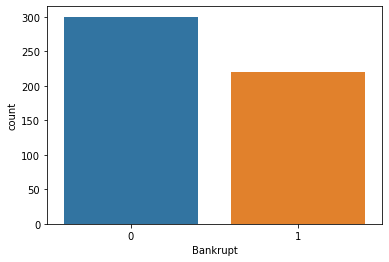

In [872]:
sns.countplot(x='Bankrupt',data=new_sample)

In [873]:
new_sample.corr()['Bankrupt']

Debt_ratio(Percent)                    0.586753
Borrow_depend                          0.552043
current_Liability/Assets               0.449658
Current_Liabilities/Equity             0.450468
Current_Liability_to_Equity            0.450468
Current_Liability_to_Current_Assets    0.524742
Liability_to_Equity                    0.509345
ROA(C)                                -0.576459
ROA(A)                                -0.588699
ROA(B)                                -0.582592
Net_Value(B)                          -0.562345
Net_Value(A)                          -0.562576
Net_Value(C)                          -0.559260
EPS                                   -0.614732
Net_profit_before_tax(Yuan)           -0.590748
Net_Worth                             -0.586753
Net_profit_before_tax/paid            -0.599082
Working_capital                       -0.497253
Retained_Earnings                     -0.638627
Net_Income_Total                      -0.620716
Net_Income_Stockholder                -0

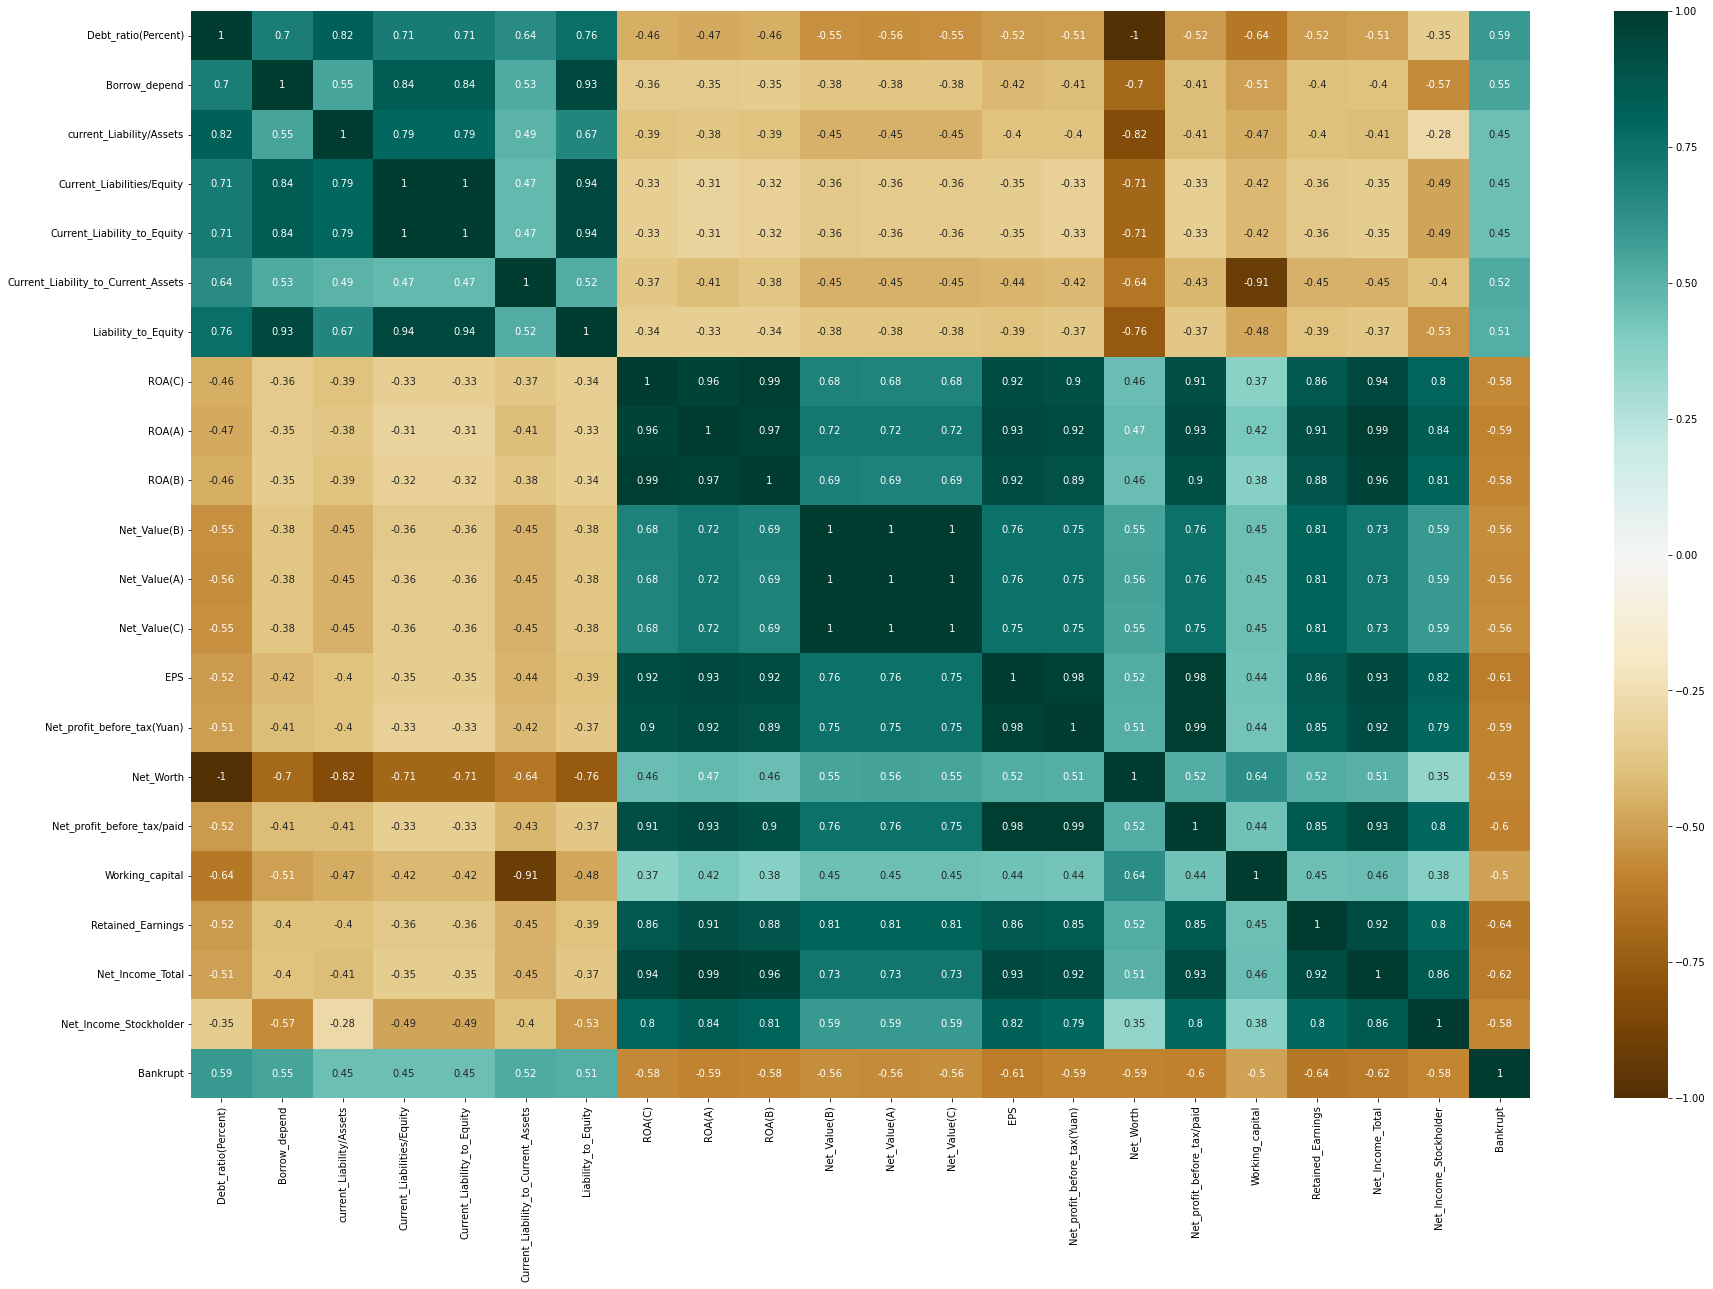

In [874]:
plt.figure(figsize=(30,20))
sns.heatmap(new_sample.corr(),annot=True,cmap='BrBG')
plt.show()

In [875]:
from scipy.stats import ttest_ind

# Hypothesis testing
significant_features = []
for column in new_sample.select_dtypes(include=[np.number]).columns:
    if column != 'Bankrupt':
        bankrupt = new_sample[new_sample['Bankrupt'] == 1][column]
        non_bankrupt = new_sample[new_sample['Bankrupt'] == 0][column]
        t_stat, p_val = ttest_ind(bankrupt, non_bankrupt)
        if p_val < 0.05:
            significant_features.append(column)
        print(f'{column}: t-statistic={t_stat}, p-value={p_val}')

print(f'Significant features: {significant_features}')

Debt_ratio(Percent): t-statistic=16.491536667684493, p-value=2.016902502388666e-49
Borrow_depend: t-statistic=15.068439957107786, p-value=8.220561513863074e-43
current_Liability/Assets: t-statistic=11.457711221585061, p-value=3.0207104454487364e-27
Current_Liabilities/Equity: t-statistic=11.483599484770485, p-value=2.3795710178117165e-27
Current_Liability_to_Equity: t-statistic=11.483599484770485, p-value=2.3795710178117165e-27
Current_Liability_to_Current_Assets: t-statistic=14.029678793285955, p-value=3.9358824656869107e-38
Liability_to_Equity: t-statistic=13.470848920533461, p-value=1.1282762366792722e-35
ROA(C): t-statistic=-16.05624956550506, p-value=2.227892399346056e-47
ROA(A): t-statistic=-16.575142336587586, p-value=8.134112036955263e-50
ROA(B): t-statistic=-16.31414465972286, p-value=1.378575580602079e-48
Net_Value(B): t-statistic=-15.477964195303986, p-value=1.0816215245619158e-44
Net_Value(A): t-statistic=-15.487258762413713, p-value=9.798826043415548e-45
Net_Value(C): t-st

In [876]:
len(significant_features)

21

In [877]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [878]:
new_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 1131
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Debt_ratio(Percent)                  520 non-null    float64
 1   Borrow_depend                        520 non-null    float64
 2   current_Liability/Assets             520 non-null    float64
 3   Current_Liabilities/Equity           520 non-null    float64
 4   Current_Liability_to_Equity          520 non-null    float64
 5   Current_Liability_to_Current_Assets  520 non-null    float64
 6   Liability_to_Equity                  520 non-null    float64
 7   ROA(C)                               520 non-null    float64
 8   ROA(A)                               520 non-null    float64
 9   ROA(B)                               520 non-null    float64
 10  Net_Value(B)                         520 non-null    float64
 11  Net_Value(A)                   

In [879]:
response=new_sample.iloc[:,-1]

In [880]:
predictor=new_sample.iloc[:,0:21]

In [881]:
x_train, x_test, y_train, y_test = train_test_split(predictor,response, test_size=0.2)

In [882]:
x_train=sm.add_constant(x_train,prepend=False)
x_test=sm.add_constant(x_test,prepend=False)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [883]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:               Bankrupt   No. Observations:                 5455
Model:                          Logit   Df Residuals:                     5435
Method:                           MLE   Df Model:                           19
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.3921
Time:                        22:43:28   Log-Likelihood:                -495.19
converged:                       True   LL-Null:                       -814.54
Covariance Type:            nonrobust   LLR p-value:                3.373e-123
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Debt_ratio(Percent)                    35.6862   4.74e+06   7.53e-06      1.000   -9.28e+06    9.28e+06
Borrow_depend                         171.9425     34.61

In [884]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [885]:
y_pred = logistic_model.predict(x_test)

In [886]:
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        69
           1       0.82      0.80      0.81        35

    accuracy                           0.88       104
   macro avg       0.86      0.86      0.86       104
weighted avg       0.87      0.88      0.87       104

Accuracy: 0.875


In [887]:
print(confusion_matrix(y_test,y_pred))

[[63  6]
 [ 7 28]]


## Here data is distributed normally Hence we are getting good accuracy 
### Our precision and recall values are also good

# Deliverables:
  ######    Detailed report of the analysis.
          Response columns is right scewed peak is at the left 
  ######    Python code used.
  ######    Supporting visualizations and tables.
  ######    Presentation summarizing findings and recommendations.
          By using end model by using some predictor variables we can predict the company goes banrupt or not

# THANK YOU FOR USING OUR MODEL